### Proyecto Final Henry "FINDEDEN"
#### Machine Learning: Pre-procesamiento

Autores:

    - Caminos Federico
    - Londero Walter
    - Pizarro Hernan
    - Urteaga Facundo
    - Veron Cintia

In [43]:
# Carga de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.

In [44]:
# Carga archivos

df_businessGOOGLE = pd.read_csv("business_ML.csv") # Negocios GOOGLE 7 datos
df_businessYELP = pd.read_csv("BusinesslistYELPML.csv") # 7 business_id
df_categoriasCA = pd.read_csv("categoriasCA.csv") # 3854 CAT de CA
df_metadatos = pd.read_csv("metadatos_ML.csv") # 18776 filas x 9 columnas
df_negociosciudad = pd.read_csv("negociosciudad.csv") # 18776 gmap_id
df_reviewsGoogle = pd.read_csv("reviewsGoogle_ML.csv") # 154586 reviews con  gmap_id
df_reviewsYELP = pd.read_csv("ReviewsYELP_ML.csv") # 216 reviews con business_id
df_user = pd.read_csv("user_ML.csv") # 207 usuarios
df_yelpCA = pd.read_csv("yelpCA.csv") # 3948 business_id


#### 1. Tratamiento de categorías generales

Se estableceran las siguientes categorías:

    - Auto
    - Beauty
    - Clothes
    - Health
    - Home
    - Food
    - Entertainment
    - Education
    - Services
    - Sports
    - Technology
    - Religion
    - Stores
    - Buildings
    

In [45]:
def generalize_category(category):
    auto_keywords = ["auto", "car", "gas station", "parking", "vehicle", "tire"]
    beauty_keywords = ["beauty", "hair", "nail", "cosmetic", "spa", "salon", "massage"]
    clothes_keywords = ["clothing", "shoe", "boutique", "fashion"]
    health_keywords = ["hospital", "clinic", "doctor", "pharmacy", "dental", "health", "medical", "nurse", "vet", "veterinary",'dentist']
    home_keywords = ["home", "furniture", "garden", "real estate", "property", "plumber", "electrician", "construction",'laundromat',"dry cleaner"]
    food_keywords = ["restaurant", "cafe", "bakery", "grocery", "supermarket", "food", "bar", "pub"]
    entertainment_keywords = ["theater", "cinema", "museum", "park", "zoo", "amusement", "casino",'art gallery']
    education_keywords = ["school", "university", "college", "library", "education", "learning", "academy"]
    services_keywords = ["bank", "insurance", "consulting", "lawyer", "attorney", "service", "repair", "maintenance", "laundry", "post office"]
    sports_keywords = ["gym", "fitness", "sport", "stadium", "arena", "athletic"]
    technology_keywords = ["it", "tech", "technology", "computer", "software", "hardware", "electronics", "telecom"]
    religion_keywords = ["synagogue", "church", "buddhist", "mosque","religious"]
    stores_keywords = ['liquor store','convenience store','Store','store','coffee shop','shopping mall','cell phone store','florist',"fabric store","shop",'jeweler']
    buildings_keywords = ['corporate office','apartment','condominium','hotel','store','coffee shop','shopping mall','cell phone store','florist',"fabric store","shop"]

    if isinstance(category, str):
        
        # Convertir la categoría a minúsculas para la comparación
        category_lower = category.lower()

        if any(keyword in category_lower for keyword in auto_keywords):
            return "Auto"
        if any(keyword in category_lower for keyword in beauty_keywords):
            return "Beauty"
        if any(keyword in category_lower for keyword in clothes_keywords):
            return "Clothes"
        if any(keyword in category_lower for keyword in health_keywords):
            return "Health"
        if any(keyword in category_lower for keyword in home_keywords):
            return "Home"
        if any(keyword in category_lower for keyword in food_keywords):
            return "Food"
        if any(keyword in category_lower for keyword in entertainment_keywords):
            return "Entertainment"
        if any(keyword in category_lower for keyword in education_keywords):
            return "Education"
        if any(keyword in category_lower for keyword in services_keywords):
            return "Services"
        if any(keyword in category_lower for keyword in sports_keywords):
            return "Sports"
        if any(keyword in category_lower for keyword in technology_keywords):
            return "Technology"
        if any(keyword in category_lower for keyword in religion_keywords):
            return "Religion"
        if any(keyword in category_lower for keyword in stores_keywords):
            return "Stores"
        if any(keyword in category_lower for keyword in buildings_keywords):
            return "Buildings"
        
        return "Other"
    
    return "Other"

# Aplicar la función al DataFrame
df_metadatos['general_category'] = df_metadatos['category'].apply(generalize_category)

In [46]:
df_metadatos["general_category"].value_counts()

general_category
Food             3421
Other            2998
Stores           2181
Services         1888
Auto             1888
Beauty           1270
Home              865
Health            757
Clothes           754
Technology        720
Buildings         547
Religion          531
Entertainment     404
Education         344
Sports            208
Name: count, dtype: int64

In [47]:
# Filtrar el DataFrame donde general_category es igual a "Other"
filtered_df = df_metadatos[df_metadatos["general_category"] == "Other"]

# Contar los valores de la columna "category" en el DataFrame filtrado
category_counts = filtered_df["category"].value_counts()

# Mostrar los resultados
category_counts.head(10)

category
['Bus stop']                       282
['Historical landmark']             65
['Smog inspection station']         64
['Association or organization']     53
['ATM']                             49
['Recording studio']                46
['Bus station']                     42
['Airline']                         38
['Pet groomer']                     37
['Law firm']                        36
Name: count, dtype: int64

#### 2. Tratamiento de categorías de locales

Se estableceran las siguientes categorías de elección con sus sub-categorías:

    Restaurant: - Comida asiática
                - Comida latinoamericana
                - Comida europea
                - Comida norteamericana y fast food
                - Comida vegana y vegetariana

    Religion:   - Protestanismo (cat 1)
                - Catolisismo (cat 2)
                - Judaísmo (cat 3)
                - Budismo (cat 4)
                - Islam (cat 5)
    Recreation:
                - Arte, música, teatro, cine, bibliotecas (cat 1)
                - Clubes nocturnos (cat 2)
                - Salas de Bowling, pool, dardos, casino (cat 3)

Se establece la categoría general de bienestar:

    Bienestar: - Lugares públicos de esparcimiento
               - Centros asistenciales de salud
               - Estaciones policiales
               - Estaciones de bomberos
               - Gimnasios y centros de actividad física
               - Farmacias

In [48]:
# Funciones para seleccionar categorías de restaurants

# Función para verificar y asignar res_asian
def categorize_res_asian(categories):
    if isinstance(categories, str):
        if any(keyword in categories for keyword in ["Asian restaurant", "Vietnamese restaurant","Chinese restaurant", 
                                                     "Sushi restaurant", "Ramen restaurant", "Korean restaurant", 
                                                     "Japanese restaurant","Sushi takeaway","Chinese takeaway",
                                                     "Asian fusion restaurant", "Southeast Asian restaurant", "South Asian restaurant",
                                                     "Thai restaurant", "Korean barbecue restaurant"]):
            return 1
    return 0

# Función para verificar y asignar res_latin
def categorize_res_latin(categories):
    if isinstance(categories, str):
        if any(keyword in categories for keyword in ["Mexican restaurant", "Tex-Mex restaurant","Mexican torta restaurant", 
                                                     "Taco restaurant", "Burrito restaurant", "Salvadoran restaurant", 
                                                     "South American restaurant","Latin American restaurant","Nuevo Latino restaurant",
                                                     "Pan-Latin restaurant", "Argentinian restaurant", "Brazilian restaurant",
                                                     "Colombian restaurant", "Venezuelan restaurant", "Peruvian restaurant",
                                                     "Central American restaurant"]):
            return 1
    return 0

# Función para verificar y asignar res_euro
def categorize_res_euro(categories):
    if isinstance(categories, str):
        if any(keyword in categories for keyword in ["Greek restaurant", "Italian restaurant", "Northern Italian restaurant", 
                                                     "Southern Italian restaurant", "Spanish restaurant", "Mediterranean restaurant", 
                                                     "French restaurant","Modern French restaurant","Haute French restaurant",
                                                     "French steakhouse restaurant", "German restaurant", "British restaurant",
                                                     "Russian restaurant", "European restaurant", "Modern European restaurant"]):
            return 1
    return 0

# Función para verificar y asignar res_latin
def categorize_res_fast(categories):
    if isinstance(categories, str):
        if any(keyword in categories for keyword in ["Fast food restaurant", "Hamburguer restaurant", "American restaurant", 
                                                     "Sandwich shop", "Pizza restaurant", "Pizza delivery", 
                                                     "Pizza takeout","Pizza takeaway","Hot dog restaurant",
                                                     "Hot dog stand", "Chicken wings restaurant", "Chicken restaurant",
                                                     "Fried Chicken takeaway", "Barbecue restaurant", "Salad shop"]):
            return 1
    return 0

# Función para verificar y asignar res_latin
def categorize_res_vegan(categories):
    if isinstance(categories, str):
        if any(keyword in categories for keyword in ["Vegan restaurant", "Salad shop", "Vegetarian restaurant", 
                                                     "Vegetarian cafe and deli"]):
            return 1
    return 0

In [49]:
# Aplicar la función a cada fila
df_metadatos["res_asian"] = df_metadatos["category"].apply(categorize_res_asian)
df_metadatos["res_latin"] = df_metadatos["category"].apply(categorize_res_latin)
df_metadatos["res_euro"] = df_metadatos["category"].apply(categorize_res_euro)
df_metadatos["res_fast"] = df_metadatos["category"].apply(categorize_res_fast)
df_metadatos["res_vegan"] = df_metadatos["category"].apply(categorize_res_vegan)


In [50]:
# Funciones para seleccionar categorías de religion

# Función para verificar y asignar rel_pro
def categorize_rel(categories):
    if isinstance(categories, str):
        
        if any(keyword in categories for keyword in ["Gospel church", "Reformed church", "Foursquare church",
                                                     "Church of the Nazarene", "Apostolic church", "Evangelical church", 
                                                     "Assemblies of God church", "Calvary Chapel church", "Pentecostal church", 
                                                     "Methodist church", "Church of Christ", "Non-denominational church", 
                                                     "Presbyterian church", "Lutheran church", "Baptist church", 
                                                     "Christian church", "Protestant church"]):
            return 1
        
        if any(keyword in categories for keyword in ["Catholic church", "Cathedral","Catholic Cathedral"]):
            return 2

        if any(keyword in categories for keyword in ["Synagogue", "Orthodox synagogue","Reform synagogue",
                                                     "Conservative synagogue","Messianic synagogue"]):
            return 3

        if any(keyword in categories for keyword in ["Buddhist temple"]):
            return 4

        if any(keyword in categories for keyword in ["Mosque"]):
            return 5

    return 0


In [51]:
# Aplicar la función a cada fila
df_metadatos["religion"] = df_metadatos["category"].apply(categorize_rel)

In [52]:
# Funciones para seleccionar categorías de recreacion

# Función para verificar y asignar rel_pro
def categorize_rec(categories):
    if isinstance(categories, str):
        
        if any(keyword in categories for keyword in ["Performing arts theater", "Movie theater", "Amphitheater",
                                                     "Drama theater", "Outdoor movie theater", "Drive-in movie theater", 
                                                     "Ballet theater", "Live music venue", "Live music bar", 
                                                     "Musical club", "Public library"]):
            return 1
        
        if any(keyword in categories for keyword in ["Night club", "Disco club","Dance hall", 
                                                     "Pub", "Brewpub", "Gastropub", "Irish pub"]):
            return 2

        if any(keyword in categories for keyword in ["Bowling alley", "Sports bar","Pool hall",
                                                     "Pool billard club","Video arcade", "Dart bar",
                                                     "Casino"]):
            return 3
        
    return 0

In [53]:
# Aplicar la función a cada fila
df_metadatos["recreation"] = df_metadatos["category"].apply(categorize_rec)

In [54]:
# Funciones para seleccionar categorías de bienestar

# Función para verificar y asignar bien
def categorize_bien(categories):
    if isinstance(categories, str):
        if any(keyword in categories for keyword in ["Public beach", "public swimming pool", "Public educational institution",
                                                      "Medical center", "Medical clinic", "Hospital",
                                                      "General hospital", "Fire station", "Police department",
                                                      "Police station", "State police", "Civil police",
                                                      "Park", "Gym", "Pharmacy", "Fitness center"]):
            return 1
    return 0

In [55]:
# Aplicar la función a cada fila
df_metadatos["bienestar"] = df_metadatos["category"].apply(categorize_bien)

In [56]:
# Mostrar las primeras filas del DataFrame
df_metadatos["recreation"].value_counts()

recreation
0    18468
2      145
1      137
3       26
Name: count, dtype: int64

#### 3. Filtrado de locales que aporten información al algoritmo y chequeo con otras fuentes

In [57]:
# Lista de columnas a verificar
columns_to_check = ['res_asian', 'res_euro', 'res_latin', 'res_fast', 'res_vegan', 'religion', 'recreation', 'bienestar']

# Filtrar el DataFrame
df_metadatos_filtered = df_metadatos[df_metadatos[columns_to_check].any(axis=1)]

In [58]:
df_metadatos_filtered.info() # De 18776 a 2814

<class 'pandas.core.frame.DataFrame'>
Index: 2814 entries, 1 to 18775
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           2814 non-null   object 
 1   gmap_id           2814 non-null   object 
 2   latitude          2814 non-null   float64
 3   longitude         2814 non-null   float64
 4   category          2814 non-null   object 
 5   avg_rating        2814 non-null   float64
 6   num_of_reviews    2814 non-null   int64  
 7   Hours_day         2814 non-null   int64  
 8   Hours_night       2814 non-null   int64  
 9   general_category  2814 non-null   object 
 10  res_asian         2814 non-null   int64  
 11  res_latin         2814 non-null   int64  
 12  res_euro          2814 non-null   int64  
 13  res_fast          2814 non-null   int64  
 14  res_vegan         2814 non-null   int64  
 15  religion          2814 non-null   int64  
 16  recreation        2814 non-null   int64  
 17 

In [59]:
# Obtener los "gmap_id" únicos de df_metadatos_filtered
gmap_ids_filtered = df_metadatos_filtered['gmap_id'].unique()

# Filtrar df_reviewsGoogle
df_reviewsGoogle_filtered = df_reviewsGoogle[df_reviewsGoogle['gmap_id'].isin(gmap_ids_filtered)]

In [60]:
df_reviewsGoogle_filtered.info() # De 154586 a 52407

<class 'pandas.core.frame.DataFrame'>
Index: 52407 entries, 0 to 154443
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  52407 non-null  float64
 1   time     52407 non-null  int64  
 2   rating   52407 non-null  int64  
 3   gmap_id  52407 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ MB


In [61]:
df_reviewsGoogle_filtered['date'] = pd.to_datetime(df_reviewsGoogle['time'], unit='ms')
df_reviewsGoogle_filtered

,user_id,time,rating,gmap_id,date
0,1.089912e+20,1609909927056,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-01-06 05:12:07.056
1,1.112903e+20,1612849648663,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-02-09 05:47:28.663
2,1.126404e+20,1583643882296,4,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2020-03-08 05:04:42.296
3,1.174403e+20,1551938216355,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2019-03-07 05:56:56.355
4,1.005808e+20,1494910901933,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2017-05-16 05:01:41.933
...,...,...,...,...,...
154439,1.064552e+20,1563494706323,5,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-07-19 00:05:06.323
154440,1.164411e+20,1560529465601,3,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-06-14 16:24:25.601
154441,1.011934e+20,1571624221742,4,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-10-21 02:17:01.742
154442,1.100051e+20,1555389818932,3,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-04-16 04:43:38.932


#### 3. Tratamiento de usuarios

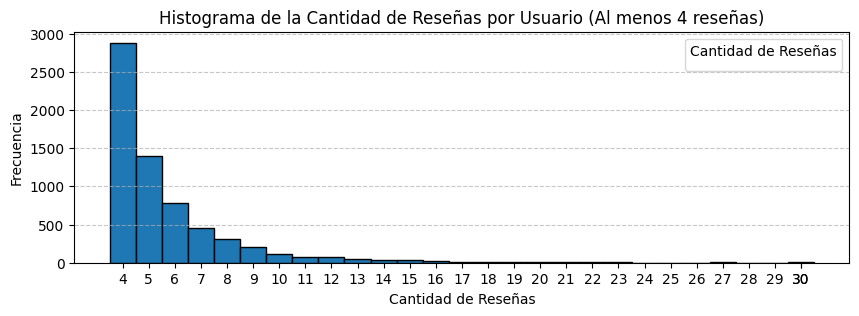

In [62]:
# Contar la cantidad de reseñas por user_id
reviews_count = df_reviewsGoogle['user_id'].value_counts()

# Filtrar los usuarios con más de 7 reseñas
filtered_reviews_count = reviews_count[reviews_count > 3]

# Limitar la cantidad de reseñas a un máximo de 30 para agrupar en el histograma
filtered_reviews_count_clipped = filtered_reviews_count.clip(upper=30)

# Crear el histograma
plt.figure(figsize=(10, 3))
plt.hist(filtered_reviews_count_clipped, bins=list(range(4, 31)) + [31], edgecolor='black', align='left')
plt.title('Histograma de la Cantidad de Reseñas por Usuario (Al menos 4 reseñas)')
plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Frecuencia')
plt.xticks(list(range(4, 31)) + [30])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir una leyenda personalizada
handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = list(range(4, 30)) + ['30+']
plt.legend(handles, custom_labels, title="Cantidad de Reseñas")

# Mostrar el histograma
plt.show()

In [63]:
# Merge para añadir avg_rating al df_reviewsGoogle
df_reviewsGoogle = df_reviewsGoogle.merge(df_metadatos[['gmap_id', 'avg_rating', 'general_category']], on='gmap_id', how='left')

# Renombrar la columna avg_rating a business_avg_rating
df_reviewsGoogle.rename(columns={'avg_rating': 'business_avg_rating'}, inplace=True)

# Crear la columna dif_rating
df_reviewsGoogle['dif_rating'] = df_reviewsGoogle['business_avg_rating'] - df_reviewsGoogle['rating']

# Calcular la cantidad de reseñas por usuario
user_reviews_count = df_reviewsGoogle['user_id'].value_counts().reset_index()
user_reviews_count.columns = ['user_id', 'reviews_count']

# Calcular la media de dif_rating por usuario
user_avg_dif_rating = df_reviewsGoogle.groupby('user_id')['dif_rating'].mean().reset_index()
user_avg_dif_rating.columns = ['user_id', 'avg_dif_rating']

# Calcular las reseñas por user_id y general_category
user_category_reviews = df_reviewsGoogle.groupby(['user_id', 'general_category']).size().reset_index(name='category_reviews')

# Pivote de los datos para tener general_category como columnas
user_category_pivot = user_category_reviews.pivot(index='user_id', columns='general_category', values='category_reviews').fillna(0).reset_index()

# Merge para combinar la cantidad de reseñas y la media de dif_rating por usuario
df_user_stats = user_reviews_count.merge(user_avg_dif_rating, on='user_id', how='left')

# Filtrar df_user_stats para incluir solo user_id con 8 reseñas o más
df_user_stats_filtered = df_user_stats[df_user_stats['reviews_count'] >= 4]

# Merge con df_user_stats_filtered para agregar las categorías
df_user_stats_filtered = df_user_stats_filtered.merge(user_category_pivot, on='user_id', how='left')



In [64]:
# Calcular la media de dif_rating en valor absoluto por usuario
user_avg_dif_modulo = df_reviewsGoogle.groupby('user_id')['dif_rating'].apply(lambda x: x.abs().mean()).reset_index()
user_avg_dif_modulo.columns = ['user_id', 'avg_dif_modulo']

# Merge para combinar avg_dif_modulo con df_user_stats_filtered
df_user_stats_filtered = df_user_stats_filtered.merge(user_avg_dif_modulo, on='user_id', how='left')

In [65]:
# Definir la lista de categorías
categories = ['Auto', 'Beauty', 'Buildings', 'Clothes', 'Education', 'Entertainment', 'Food', 'Health',
              'Home', 'Other', 'Religion', 'Services', 'Sports', 'Stores', 'Technology']

# Crear la columna sum_category
df_user_stats_filtered['sum_category'] = df_user_stats_filtered[categories].apply(lambda x: (x > 0).sum(), axis=1)

# Eliminar las columnas de categorías específicas
df_user_stats_filtered = df_user_stats_filtered.drop(columns=categories)

In [66]:
df_user_stats_filtered.head()

,user_id,reviews_count,avg_dif_rating,avg_dif_modulo,sum_category
0,1.077740e+20,63,-0.852381,0.852381,15
1,1.121287e+20,53,-0.813208,0.813208,15
2,1.070514e+20,49,0.336735,0.459184,12
3,1.084387e+20,43,-0.372093,0.902326,10
4,1.153560e+20,38,-0.639474,0.650000,11


In [67]:
# Calcular máximo y mínimo de cada columna en df_user_stats_filtered
max_values = df_user_stats_filtered.max()
min_values = df_user_stats_filtered.min()

print("Valores máximos:")
print(max_values)
print("\nValores mínimos:")
print(min_values)

Valores máximos:
user_id           1.184396e+20
reviews_count     6.300000e+01
avg_dif_rating    3.380000e+00
avg_dif_modulo    3.380000e+00
sum_category      1.500000e+01
dtype: float64

Valores mínimos:
user_id           1.000094e+20
reviews_count     4.000000e+00
avg_dif_rating   -2.300000e+00
avg_dif_modulo    1.200000e-01
sum_category      1.000000e+00
dtype: float64


In [68]:
df_user_stats_filtered["reviews_count"].value_counts()

reviews_count
4     2880
5     1392
6      785
7      450
8      305
9      207
10     110
12      74
11      74
13      46
14      34
15      33
16      22
18      13
17      12
19      11
20       9
21       6
23       5
22       5
27       3
24       2
25       2
26       2
30       2
33       2
34       2
53       1
38       1
49       1
43       1
29       1
35       1
28       1
63       1
Name: count, dtype: int64

In [69]:
# Definir las condiciones y las puntuaciones correspondientes
conditions = [
    (df_user_stats_filtered['reviews_count'] > 9) & 
    (df_user_stats_filtered['avg_dif_rating'].between(-0.5, 0.5, inclusive='both')) & 
    (df_user_stats_filtered['avg_dif_modulo'] <= 1) &
    (df_user_stats_filtered['sum_category'] > 6),

    (df_user_stats_filtered['reviews_count'] > 9) & 
    #(df_user_stats_filtered['avg_dif_rating'].between(-0.5, 0.5, inclusive='both')) & 
    (df_user_stats_filtered['avg_dif_modulo'] <= 1) &
    (df_user_stats_filtered['sum_category'] > 6),

    #(df_user_stats_filtered['reviews_count'] > 9) &
    (df_user_stats_filtered['sum_category'] > 3) &
    (df_user_stats_filtered['avg_dif_modulo'] <= 1),

    (df_user_stats_filtered['avg_dif_modulo'] <= 1.5),
]

choices = [5, 4, 3, 2]

# Aplicar las condiciones y asignar la columna user_rating
df_user_stats_filtered['user_rating'] = np.select(conditions, choices, default=1)

In [70]:
df_user_stats_filtered["user_rating"].value_counts()

user_rating
2    3871
3    1998
1     476
5      81
4      70
Name: count, dtype: int64

In [71]:
df_reviewsGoogle_filtered

,user_id,time,rating,gmap_id,date
0,1.089912e+20,1609909927056,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-01-06 05:12:07.056
1,1.112903e+20,1612849648663,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-02-09 05:47:28.663
2,1.126404e+20,1583643882296,4,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2020-03-08 05:04:42.296
3,1.174403e+20,1551938216355,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2019-03-07 05:56:56.355
4,1.005808e+20,1494910901933,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2017-05-16 05:01:41.933
...,...,...,...,...,...
154439,1.064552e+20,1563494706323,5,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-07-19 00:05:06.323
154440,1.164411e+20,1560529465601,3,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-06-14 16:24:25.601
154441,1.011934e+20,1571624221742,4,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-10-21 02:17:01.742
154442,1.100051e+20,1555389818932,3,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-04-16 04:43:38.932


#### 4. Creación de base de datos final de locales con usuarios ponderados

In [72]:
# Realizar el merge para añadir user_rating a df_reviewsGoogle_filtered
df_reviewsGoogle_filtered = df_reviewsGoogle_filtered.merge(df_user_stats_filtered[['user_id', 'user_rating']], on='user_id', how='left')

# Rellenar los valores faltantes en user_rating con 1
df_reviewsGoogle_filtered['user_rating'].fillna(1, inplace=True)

# Asegurar que user_rating sea de tipo entero si es necesario
df_reviewsGoogle_filtered['user_rating'] = df_reviewsGoogle_filtered['user_rating'].astype(int)

In [73]:
df_reviewsGoogle_filtered["user_rating"].value_counts()

user_rating
1    41886
2     6502
3     3391
5      333
4      295
Name: count, dtype: int64

In [74]:
df_reviewsGoogle_filtered

,user_id,time,rating,gmap_id,date,user_rating
0,1.089912e+20,1609909927056,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-01-06 05:12:07.056,1
1,1.112903e+20,1612849648663,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-02-09 05:47:28.663,1
2,1.126404e+20,1583643882296,4,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2020-03-08 05:04:42.296,3
3,1.174403e+20,1551938216355,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2019-03-07 05:56:56.355,3
4,1.005808e+20,1494910901933,5,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2017-05-16 05:01:41.933,1
...,...,...,...,...,...,...
52402,1.064552e+20,1563494706323,5,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-07-19 00:05:06.323,1
52403,1.164411e+20,1560529465601,3,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-06-14 16:24:25.601,1
52404,1.011934e+20,1571624221742,4,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-10-21 02:17:01.742,1
52405,1.100051e+20,1555389818932,3,0x80c2b82e593589a1:0x35602b6daadce0d7,2019-04-16 04:43:38.932,1


In [75]:
# Paso 2: Calcular la suma ponderada de ratings y la suma ponderada de las ponderaciones por gmap_id
df_reviewsGoogle_filtered['weighted_rating'] = df_reviewsGoogle_filtered['rating'] * df_reviewsGoogle_filtered['user_rating']
df_reviewsGoogle_filtered['weight'] = df_reviewsGoogle_filtered['user_rating']

# Agrupar por gmap_id y calcular las sumas ponderadas
grouped = df_reviewsGoogle_filtered.groupby('gmap_id').agg(
    total_weighted_rating=('weighted_rating', 'sum'),
    total_weight=('weight', 'sum')
).reset_index()

# Paso 3: Calcular avg_rating_correction dividiendo la suma ponderada de ratings entre la suma ponderada de las ponderaciones
grouped['avg_rating_correction'] = grouped['total_weighted_rating'] / grouped['total_weight']

# Paso 4: Merge de avg_rating_correction con df_metadatos_filtered
df_metadatos_filtered = df_metadatos_filtered.merge(grouped[['gmap_id', 'avg_rating_correction']], on='gmap_id', how='left')


In [76]:
df_metadatos_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2814 entries, 0 to 2813
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address                2814 non-null   object 
 1   gmap_id                2814 non-null   object 
 2   latitude               2814 non-null   float64
 3   longitude              2814 non-null   float64
 4   category               2814 non-null   object 
 5   avg_rating             2814 non-null   float64
 6   num_of_reviews         2814 non-null   int64  
 7   Hours_day              2814 non-null   int64  
 8   Hours_night            2814 non-null   int64  
 9   general_category       2814 non-null   object 
 10  res_asian              2814 non-null   int64  
 11  res_latin              2814 non-null   int64  
 12  res_euro               2814 non-null   int64  
 13  res_fast               2814 non-null   int64  
 14  res_vegan              2814 non-null   int64  
 15  reli

In [77]:
# Contar los gmap_id únicos en cada DataFrame
gmap_ids_reviews = set(df_reviewsGoogle_filtered['gmap_id'])
gmap_ids_metadatos = set(df_metadatos_filtered['gmap_id'])

# Contar el número de gmap_id únicos en cada DataFrame
count_gmap_ids_reviews = len(gmap_ids_reviews)
count_gmap_ids_metadatos = len(gmap_ids_metadatos)

# Encontrar los gmap_id que están en ambos DataFrames
common_gmap_ids = gmap_ids_reviews.intersection(gmap_ids_metadatos)
count_common_gmap_ids = len(common_gmap_ids)

# Encontrar los gmap_id que faltan en cada DataFrame
gmap_ids_missing_in_reviews = gmap_ids_metadatos - gmap_ids_reviews
gmap_ids_missing_in_metadatos = gmap_ids_reviews - gmap_ids_metadatos

count_gmap_ids_missing_in_reviews = len(gmap_ids_missing_in_reviews)
count_gmap_ids_missing_in_metadatos = len(gmap_ids_missing_in_metadatos)

# Resultados
print(f"gmap_id únicos en df_reviewsGoogle_filtered: {count_gmap_ids_reviews}")
print(f"gmap_id únicos en df_metadatos_filtered: {count_gmap_ids_metadatos}")
print(f"gmap_id comunes en ambos DataFrames: {count_common_gmap_ids}")
print(f"gmap_id faltantes en df_reviewsGoogle_filtered: {count_gmap_ids_missing_in_reviews}")
print(f"gmap_id faltantes en df_metadatos_filtered: {count_gmap_ids_missing_in_metadatos}")

gmap_id únicos en df_reviewsGoogle_filtered: 767
gmap_id únicos en df_metadatos_filtered: 2814
gmap_id comunes en ambos DataFrames: 767
gmap_id faltantes en df_reviewsGoogle_filtered: 2047
gmap_id faltantes en df_metadatos_filtered: 0


In [78]:
df_metadatos_filtered[["avg_rating","avg_rating_correction"]].head()

,avg_rating,avg_rating_correction
0,4.4,4.565217
1,4.0,4.230769
2,4.4,NaN
3,4.3,4.777778
4,4.3,4.484848


In [79]:
# Guardar df_metadatos_filtered como un archivo CSV
df_metadatos_filtered.to_csv('df_metadatos_filtered.csv', index=False)